# Лабораторная №3

**Рязанова Маргарита**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

**1. Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала**

In [2]:
def create_sierpinski_graph(order=3):
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2), (2, 0)])

    def add_sierpinski_edges(order, nodes):
        if order == 0:
            return
        u, v, w = nodes

        new_node1 = len(G)
        new_node2 = new_node1 + 1
        new_node3 = new_node2 + 1
        G.add_edges_from([(u, new_node1), (new_node1, v), (v, new_node2), (new_node2, w), (w, new_node3), (new_node3, u)])

        add_sierpinski_edges(order - 1, (u, new_node1, new_node3))
        add_sierpinski_edges(order - 1, (new_node1, v, new_node2))
        add_sierpinski_edges(order - 1, (new_node3, new_node2, w))

    add_sierpinski_edges(order, (0, 1, 2))
    return G

In [3]:
sierpinski_graph = create_sierpinski_graph(order=3)

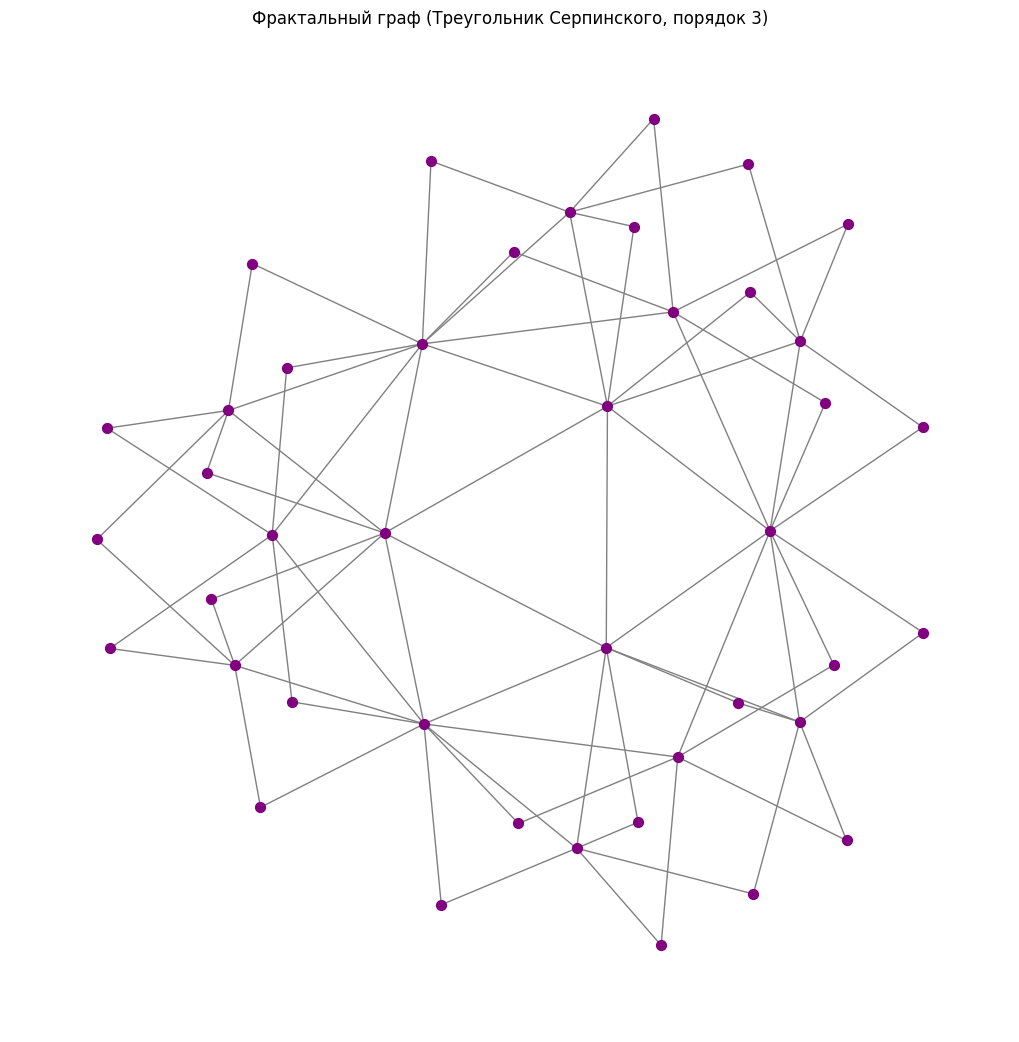

In [4]:
plt.figure(figsize=(10, 10))
nx.draw_spring(sierpinski_graph, node_size=50, node_color='purple', edge_color = 'grey')
plt.title("Фрактальный граф (Треугольник Серпинского, порядок 3)")
plt.show()

**2. Рассчитать среднюю степень вершины фрактального графа**

In [5]:
average_degree = sum(dict(sierpinski_graph.degree()).values()) / len(sierpinski_graph)
print(f"Средняя степень вершины: {average_degree:.2f}")

Средняя степень вершины: 3.86


**3. Построить распределение степеней вершин фрактального графа**

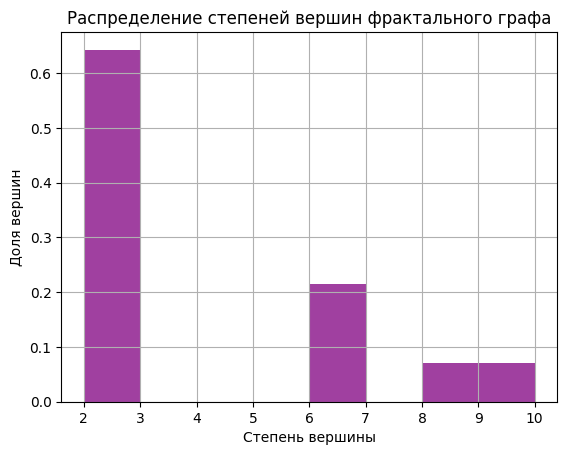

In [7]:
degrees = [deg for _, deg in sierpinski_graph.degree()]
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, alpha=0.75, color='purple')
plt.xlabel("Степень вершины")
plt.ylabel("Доля вершин")
plt.title("Распределение степеней вершин фрактального графа")
plt.grid(True)
plt.show()

**4. Модифицировать исходные формулы и параметры фрактала и повторить задание с 1 по 3.**

In [8]:
def create_modified_sierpinski_graph(order=3, add_random_edges=False, perturbation=0):
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2), (2, 0)])

    def add_sierpinski_edges(order, nodes):
        if order == 0:
            return
        u, v, w = nodes

        new_node1 = len(G)
        new_node2 = new_node1 + 1
        new_node3 = new_node2 + 1
        G.add_edges_from([(u, new_node1), (new_node1, v), (v, new_node2), (new_node2, w), (w, new_node3), (new_node3, u)])

        # Добавление случайных рёбер между узлами, чтобы усложнить граф
        if add_random_edges:
            if random.random() > 0.5:  # Добавляем случайные рёбра с вероятностью 50%
                G.add_edge(new_node1, new_node2)
            if random.random() > 0.5:
                G.add_edge(new_node2, new_node3)

        # Добавление случайного смещения координат для визуализации (пертурбация)
        perturbation_value = perturbation * (0.5 - random.random())
        G.nodes[new_node1]["pos"] = (G.nodes[u].get("pos", (0, 0))[0] + perturbation_value,
                                     G.nodes[u].get("pos", (0, 0))[1] + perturbation_value)
        G.nodes[new_node2]["pos"] = (G.nodes[v].get("pos", (0, 0))[0] + perturbation_value,
                                     G.nodes[v].get("pos", (0, 0))[1] + perturbation_value)
        G.nodes[new_node3]["pos"] = (G.nodes[w].get("pos", (0, 0))[0] + perturbation_value,
                                     G.nodes[w].get("pos", (0, 0))[1] + perturbation_value)

        add_sierpinski_edges(order - 1, (u, new_node1, new_node3))
        add_sierpinski_edges(order - 1, (new_node1, v, new_node2))
        add_sierpinski_edges(order - 1, (new_node3, new_node2, w))

    add_sierpinski_edges(order, (0, 1, 2))
    return G

In [9]:
modified_sierpinski_graph = create_modified_sierpinski_graph(order=4, add_random_edges=True, perturbation=0.05)

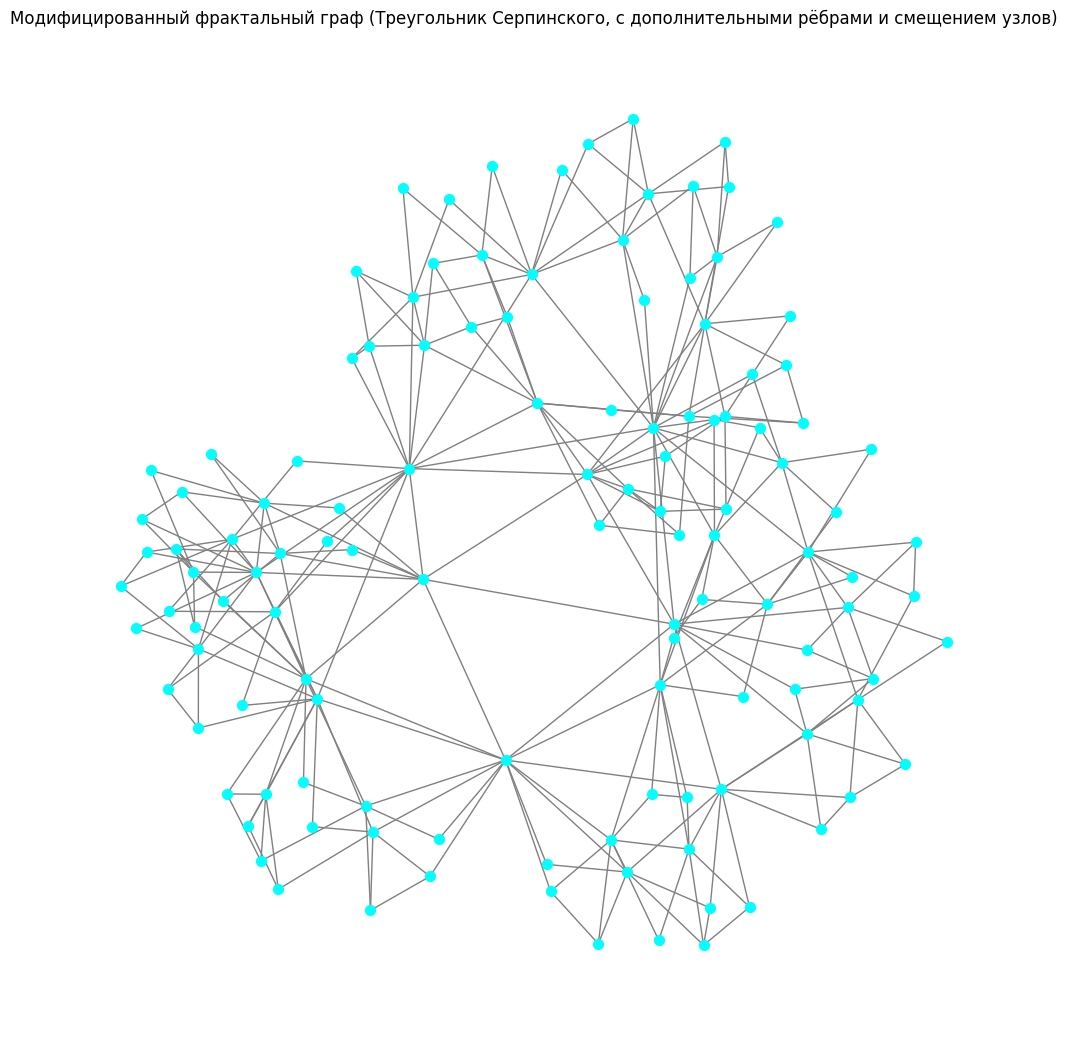

In [10]:
plt.figure(figsize=(10, 10))
nx.draw_spring(modified_sierpinski_graph, node_size=50, node_color='cyan', edge_color='gray')
plt.title("Модифицированный фрактальный граф (Треугольник Серпинского, с дополнительными рёбрами и смещением узлов)")
plt.show()

In [11]:
average_degree_modified = sum(dict(modified_sierpinski_graph.degree()).values()) / len(modified_sierpinski_graph)
print(f"Средняя степень вершины (модифицированный граф): {average_degree_modified:.2f}")

Средняя степень вершины (модифицированный граф): 4.63


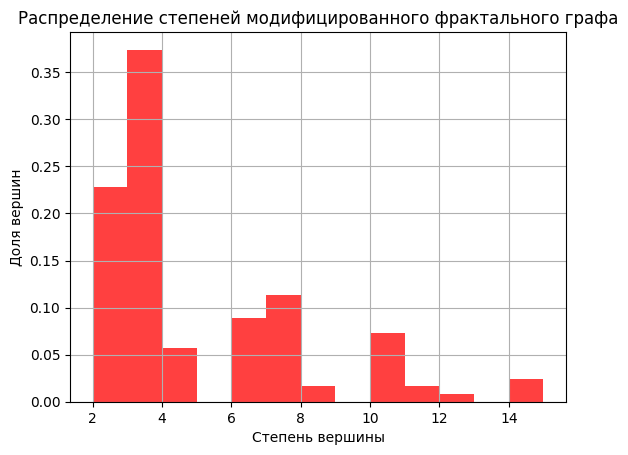

In [12]:
degrees_modified = [deg for _, deg in modified_sierpinski_graph.degree()]
plt.hist(degrees_modified, bins=range(min(degrees_modified), max(degrees_modified) + 1), density=True, alpha=0.75, color='red')
plt.xlabel("Степень вершины")
plt.ylabel("Доля вершин")
plt.title("Распределение степеней модифицированного фрактального графа")
plt.grid(True)
plt.show()